<a href="https://colab.research.google.com/github/BohdanShepel2005/Mashynne-Navchannya/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%D0%B7_%D0%9C%D0%9D_%E2%84%962_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Завантаження файлу через Google Colab
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:

# Зчитування CSV файлу після завантаження
df = pd.read_csv(next(iter(uploaded)))

In [ ]:
# 1. Вивести перших 5 рядків
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# 2. Визначити розмір датасета
print("Розмір датасету:", df.shape)

Розмір датасету: (418, 12)


In [ ]:
# 3. Визначити тип даних
print("Типи даних:")
print(df.dtypes)

Типи даних:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
# 4. Перевірка пропущених значень
print("Пропущені значення:")
print(df.isnull().sum())

Пропущені значення:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:

# Замінити пропущені значення на середнє значення
df.fillna(df.mean(numeric_only=True), inplace=True)

In [ ]:
# 5. Перевірка після заміни пропущених значень
print("Пропущені значення після заміни:")
print(df.isnull().sum())

Пропущені значення після заміни:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# 6. Перевірка наявності дублікатів
print("Кількість дублікатів:", df.duplicated().sum())
# Видалення дублікатів
df.drop_duplicates(inplace=True)

Кількість дублікатів: 0


In [ ]:
# 7. Описова статистика
display(df.describe())


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# 8. Видалення стовпця Cabin
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

In [ ]:
# 9. Формування нового датасету
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
df = df[selected_columns]

In [ ]:
# 10. Заміна 'Sex' на 0 і 1
print("Унікальні значення у 'Sex':", df['Sex'].unique())
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

Унікальні значення у 'Sex': ['male' 'female']


In [ ]:

# 11. Перевірка кількості пропущених значень
print("Пропущені значення після обробки:")
print(df.isnull().sum())

Пропущені значення після обробки:
Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64


In [ ]:
# 12. Вивести 5 перших рядків
display(df.head())


,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


In [ ]:
# 13. Вивести 5 останніх рядків
display(df.tail())

,Survived,Pclass,Sex,Age,Fare
413,0,3,0,30.27259,8.0500
414,1,1,1,39.00000,108.9000
415,0,3,0,38.50000,7.2500
416,0,3,0,30.27259,8.0500
417,0,3,0,30.27259,22.3583


In [ ]:
# 14. Відсоток виживання за статтю
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print("Відсоток виживання за статтю:")
print(survival_by_sex)

Відсоток виживання за статтю:
Sex
0      0.0
1    100.0
Name: Survived, dtype: float64


In [ ]:
# 15. Відсоток виживання за класами
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("Відсоток виживання за класами:")
print(survival_by_class)

Відсоток виживання за класами:
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64


In [ ]:
# 16. Середній вік тих, хто вижив і не вижив
age_survival = df.groupby('Survived')['Age'].mean()
print("Середній вік за виживанням:")
print(age_survival)

Середній вік за виживанням:
Survived
0    30.272699
1    30.272400
Name: Age, dtype: float64


In [ ]:
# 17. Розподіл за тарифами та виживанням
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
survival_by_fare = df.groupby('FareGroup')['Survived'].mean() * 100
print("Відсоток виживання за тарифами:")
print(survival_by_fare)

Відсоток виживання за тарифами:
FareGroup
Low          26.315789
Medium       27.083333
High         39.047619
Very High    53.398058
Name: Survived, dtype: float64


<ipython-input-21-87ff62097f3c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare = df.groupby('FareGroup')['Survived'].mean() * 100


In [ ]:
# 18. Середній тариф за класами
fare_by_class = df.groupby('Pclass')['Fare'].mean()
print("Середній тариф за класами:")
print(fare_by_class)


Середній тариф за класами:
Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64


In [ ]:
# 19. Середній вік пасажирів за класами
age_by_class = df.groupby('Pclass')['Age'].mean()
print("Середній вік за класами:")
print(age_by_class)

Середній вік за класами:
Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64


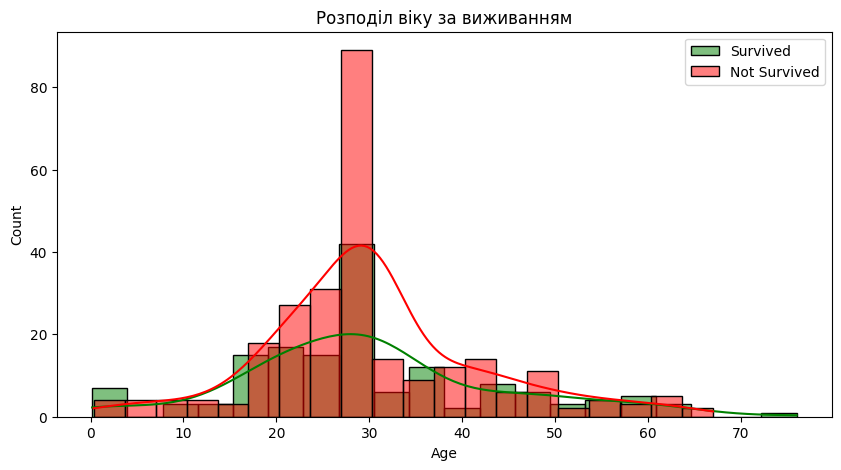

In [ ]:
# 20. Гістограма розподілу віку для тих, хто вижив і не вижив
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Survived'] == 1]['Age'], color='green', label='Survived', kde=True, bins=20)
sns.histplot(df[df['Survived'] == 0]['Age'], color='red', label='Not Survived', kde=True, bins=20)
plt.legend()
plt.title('Розподіл віку за виживанням')
plt.show()

In [ ]:
# 21. Виживання за комбінацією статі та класу
survival_by_sex_class = df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("Відсоток виживання за статтю та класом:")
print(survival_by_sex_class)

Відсоток виживання за статтю та класом:
Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64


In [ ]:
# 22. Кореляція між числовими змінними
correlation_matrix = df[['Survived', 'Pclass', 'Age', 'Fare']].corr()
print("Кореляція між змінними:")
print(correlation_matrix)

Кореляція між змінними:
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000
